In [21]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np
import seaborn as sns
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\jones\Anaconda3\envs\DereksEnvironment\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
#dataTrain = pd.read_csv("ZIP_machinelearning_retail_train.csv")
#dataTest = pd.read_csv("ZIP_machinelearning_retail_test.csv")
#dataTrain.head()

In [33]:
df = pd.read_csv("ZIP_machinelearning_retail.csv")
df.head()

,Zhvi,Parking Tickets,Per capita income,Retail
0,411900,141,100377,221
1,351700,752,69889,657
2,433200,1986,68324,620
3,238900,290,59849,75
4,388600,457,58232,100


In [34]:
target = df['Retail']

In [35]:
data = df.drop("Retail", axis=1)
feature_names = data.columns
data.head()

,Zhvi,Parking Tickets,Per capita income
0,411900,141,100377
1,351700,752,69889
2,433200,1986,68324
3,238900,290,59849
4,388600,457,58232


In [37]:
x = df.corr()
x

,Zhvi,Parking Tickets,Per capita income,Retail
Zhvi,1.000000,-0.247546,0.530287,0.339884
Parking Tickets,-0.247546,1.000000,-0.566882,0.643823
Per capita income,0.530287,-0.566882,1.000000,-0.010881
Retail,0.339884,0.643823,-0.010881,1.000000


(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1be98ee9e48>)

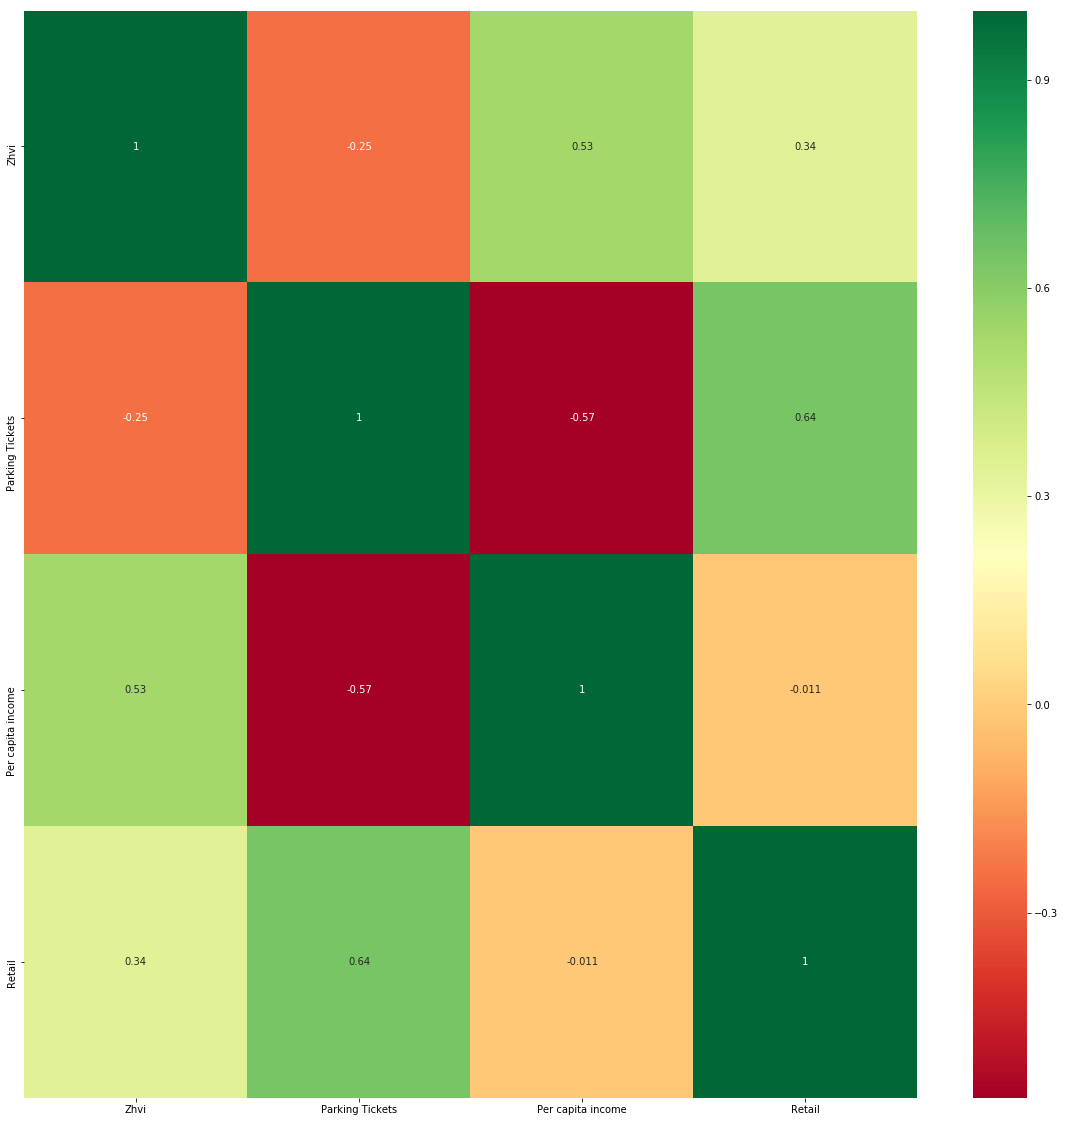

In [38]:
plt.subplots(figsize=(20,20))
sns.heatmap(x, cmap = 'RdYlGn', annot = True)
plt.show()

In [39]:
x = df.drop('Retail', axis = 1)
y = df['Retail']
x.head()
y.head()

,Zhvi,Parking Tickets,Per capita income
0,411900,141,100377
1,351700,752,69889
2,433200,1986,68324
3,238900,290,59849
4,388600,457,58232


0    221
1    657
2    620
3     75
4    100
Name: Retail, dtype: int64

In [40]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.25, random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape


(32, 3)

(11, 3)

(32,)

(11,)

In [41]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
lm.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
predict_test = lm.predict(test_x)

In [44]:
print(lm.coef_)
df_m = pd.DataFrame({'features':x.columns,'coeff':lm.coef_})
df_m = df_m.sort_values(by=['coeff'])
df_m

[0.00069681 0.11727038 0.00342046]


,features,coeff
0,Zhvi,0.000697
2,Per capita income,0.003420
1,Parking Tickets,0.117270


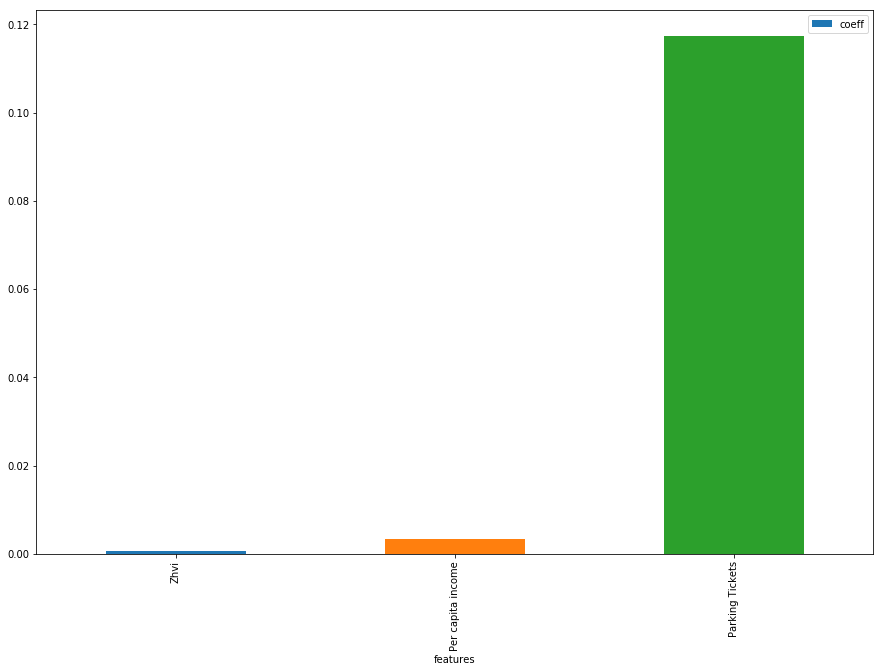

In [45]:
#feature importance
df_m.plot(x= 'features', y='coeff', kind = 'bar', figsize =(15,10))
plt.show()

In [47]:
("Rsquare value for test data =")
np.round(lm.score(test_x, test_y) * 100,0)
("Rsquare value for train data =")
np.round(lm.score(train_x, train_y) * 100,0)

'Rsquare value for test data ='

85.0

'Rsquare value for train data ='

65.0

In [48]:
import numpy as np
from sklearn import metrics
print ("Mean Squares Error for test data = ")
np.round(metrics.mean_squared_error(test_y, predict_test),0)

Mean Squares Error for test data = 


5634.0

In [51]:
from sklearn.metrics import mean_absolute_error
print ("Mean Absolute Error for test data = ")
np.round(mean_absolute_error(test_y, predict_test),0)

Mean Absolute Error for test data = 


67.0

In [50]:
#append predicted retail store openings into original data
fdf = pd.concat([test_x, test_y],1)
fdf['Predicted'] = np.round(predict_test,1)
fdf['Prediction_Error'] = fdf['Retail'] - fdf['Predicted']
fdf

,Zhvi,Parking Tickets,Per capita income,Retail,Predicted,Prediction_Error
3,238900,290,59849,75,139.3,-64.3
2,433200,1986,68324,620,502.5,117.5
24,233700,4996,40165,659,620.2,38.8
40,133200,3133,23228,180,273.7,-93.7
17,277000,2024,45064,346,318.6,27.4
30,203300,1468,34293,216,165.2,50.8
22,112000,251,40792,26,-18.9,44.9
36,278100,2188,30625,341,289.2,51.8
32,162100,3991,32622,361,426.6,-65.6
19,214500,1951,41438,114,254.1,-140.1
